In [1]:
# Importar librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

In [2]:
# Carga del conjunto de datos de precios de casas de Boston
# de la librería sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# Convertir el data set en DataFrame
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Se agrega una columna al DataFrame con el dato objetivo
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Verificar si hay datos perdidos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

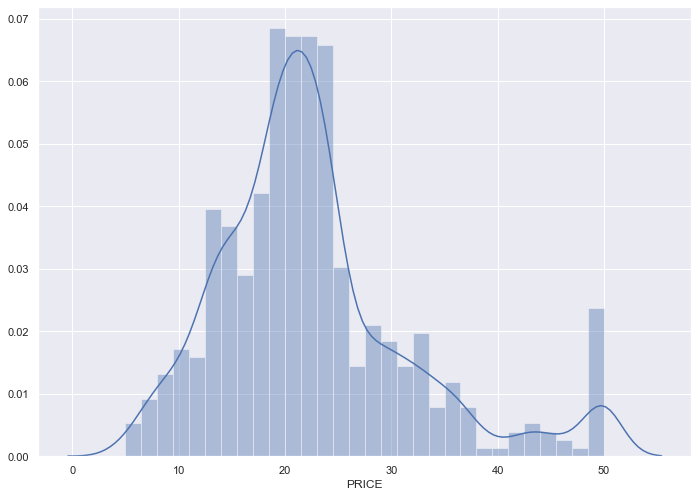

In [6]:
# Se utiliza displot de la librería seaborn para
# un análisis preliminar
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['PRICE'], bins=30)
plt.show()

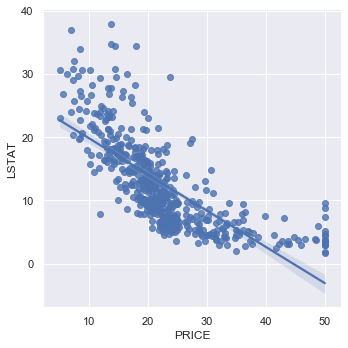

In [7]:
# Analisis de relación de características 
# específicas con la variable dependiente
sns.lmplot("PRICE", "LSTAT", df)

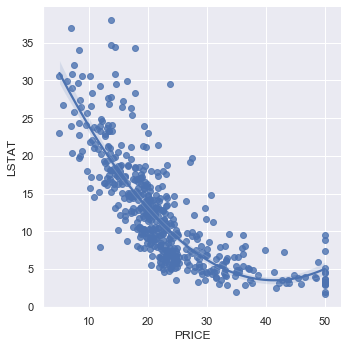

In [8]:
# Probar un modelo de orden 2 entre
# la variable PRICE y LSTAT
sns.lmplot("PRICE", "LSTAT", df, order = 2)

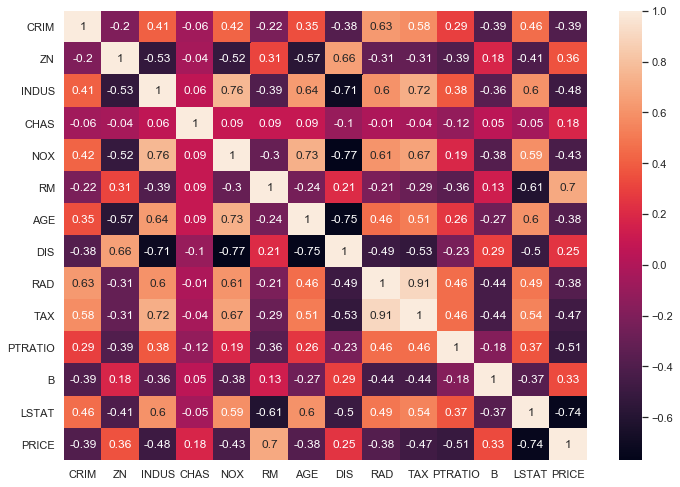

In [9]:
# Se obtiene una matriz de correlación
correlation_matrix = df.corr().round(2)
# Se usa la matriz de correlación para dibujar un mapa de calor
# annot = True para mostrar los valores dentro del cuadro
sns.heatmap(data=correlation_matrix, annot=True)

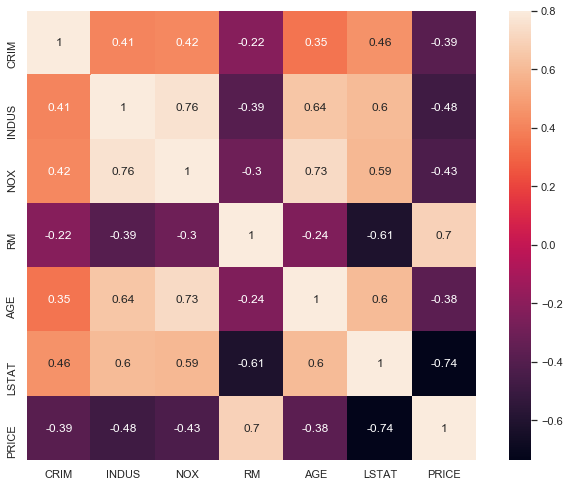

In [10]:
# Matriz de correlación reducida en características
indices = [0,2,4,5,6,12]
df2 = pd.DataFrame(boston.data[:, indices], columns = boston.feature_names[indices])
df2['PRICE'] = boston.target
corrmat = df2.corr()
# Se usa la matriz de correlación para dibujar un mapa de calor
sns.heatmap(data=corrmat, vmax = .8, annot=True, square = True)

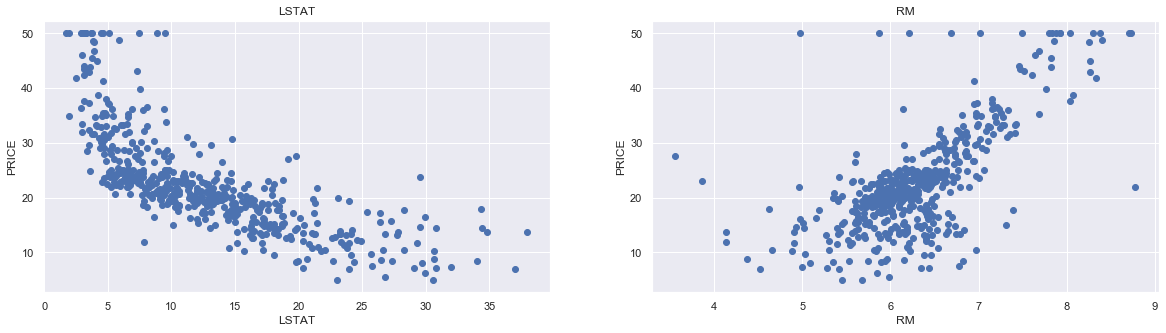

In [11]:
# Se revisa la correlación de las variables LSTAT y RM con PRICE
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219546BFDC8>,
      dtype=object)

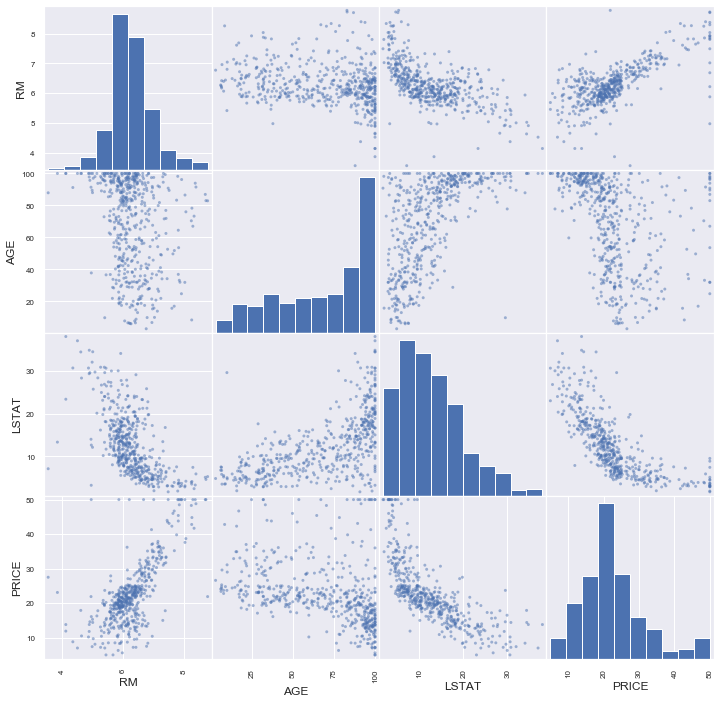

In [12]:
# Elaboración de una matriz de gráficos de dispersión
indices = [5,6,12]
df2 = pd.DataFrame(boston.data[:, indices], columns=boston.feature_names[indices])
df2['PRICE'] = boston.target
pd.plotting.scatter_matrix(df2, figsize=(12.0, 12.0))

In [13]:
# Se preparan los datos para el entrenamiento del modelo
# Se concatenan las variables LSTAT y RM usando np.c_
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['PRICE']

In [14]:
# Se dividen los datos en datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [15]:
# Se entrena y prueba el modelo de aprendizaje
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Se evalua el modelo de entrenamiento con las medidas RMSE y R2-score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('Coeficiente: ', lin_model.coef_)
print('Interceptor: ', lin_model.intercept_)

print("Rendimiento del modelo para el conjunto de entrenamiento")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 score es {}'.format(r2))
print("\n")

# Evaluación del modelo de prueba
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Rendimiento del modelo para el conjunto de prueba")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 score es {}'.format(r2))

Coeficiente:  [-0.71722954  4.58938833]
Interceptor:  2.736240342606635
Rendimiento del modelo para el conjunto de entrenamiento
--------------------------------------
RMSE es 5.6371293350711955
R2 score es 0.6300745149331701


Rendimiento del modelo para el conjunto de prueba
--------------------------------------
RMSE es 5.137400784702912
R2 score es 0.6628996975186952


Text(0, 0.5, 'Precio calculado ($1000s)')

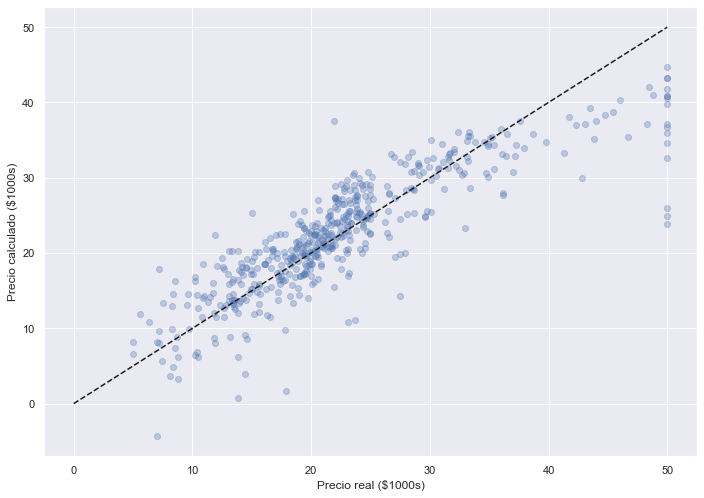

In [17]:
# Predicción de precios de datos originales y
# comparativa con el precio real
clf = LinearRegression ()
clf.fit(boston.data , boston.target)
predicted = clf.predict(boston.data)
plt.scatter(boston.target , predicted , alpha = 0.3)
plt.plot ([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('Precio real ($1000s)')
plt.ylabel('Precio calculado ($1000s)')